### Redes Neurais Tradicionais

import tensorflow as tf
tf.__version__

In [1]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


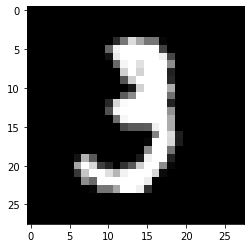

In [38]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
#fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Pré-processamento

Baseline com normalização

In [6]:
# Ou dividir por 255
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

### One hot encoder para o target

In [7]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = ohe.transform(y_test.reshape(-1,1)).toarray()

### Particionamento dos dados

In [8]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000, 10),
 (12000, 10),
 (10000, 10))

----

### Definição da arquitetura

1. Definir quantas camadas são necessárias para o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [9]:
# Tipo do modelo
from tensorflow.keras.models import Sequential

# Cmadas do modelo
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization

# Outra regularização, implementada no .fit(callbacks = [es])
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
# Enteder cada objeto
rede_simples = Sequential()
rede_simples.add(Flatten())
rede_simples.add(Dense(25, input_dim = 784)) # 25 neurônios, 784 features (28x28)
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25)) # não é preciso colocar o número de neurônios
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10)) # Camada de saída, 10 classes (output)
rede_simples.add(Activation('softmax'))

### Definição dos otimizadores

Define os parâmetros de otimização. Enteder cada otimizador (https://keras.io/api/optimizers/)

In [28]:
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam',
                     metrics = ['accuracy'])

### Treinamento

In [17]:
historico = rede_simples.fit(x_treino,
                 y_treino,
                 epochs = 30, # épocas : número de vezes que o modelo vÊ todo o dataset
                 batch_size = 32, # batches é um hiperparâmetro
                 validation_data = (x_val, y_val))  

Epoch 1/30
1500/1500 [==============================] - 7s 2ms/step - loss: 0.3944 - accuracy: 0.8830 - val_loss: 0.2205 - val_accuracy: 0.9367
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1997 - accuracy: 0.9395 - val_loss: 0.1999 - val_accuracy: 0.9401
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1657 - accuracy: 0.9509 - val_loss: 0.1832 - val_accuracy: 0.9472
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1465 - accuracy: 0.9561 - val_loss: 0.1684 - val_accuracy: 0.9514
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1301 - accuracy: 0.9605 - val_loss: 0.1593 - val_accuracy: 0.9545
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1154 - accuracy: 0.9651 - val_loss: 0.1560 - val_accuracy: 0.9545
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9671 - val_loss: 0.1588 - val_accuracy:

### Avaliação

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 3s 1ms/step


0.9579

In [35]:
pred_simples[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [36]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

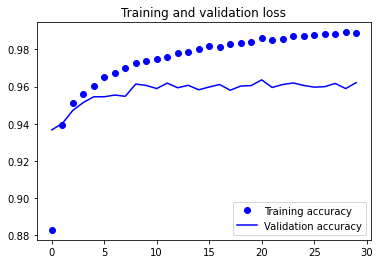

In [26]:
# Que que é 'loss'? É a perda, é o inverso da acurácia
loss = historico.history['accuracy']
val_loss = historico.history['val_accuracy']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Época ideal : 7-8 épocas

### Regularização

1. Early Stopping : determinar quando encerrar o treinamento
2. Dropout : selecionar neurônios aleatoriamente para o treinamento
3. Batch normalization : normalizar a saída das camadas

In [30]:
# callback : retorno, vai monitorar uma métrica e, se a métrica não variar, ela para
es = EarlyStopping(monitor='val_loss', patience = 10, min_delta = 0.001, verbose = 1, mode = 'auto') 
# o es vai monitora por 10 épocas, se não melhorar por 10 épocas, ele para
# min_delta

In [37]:
historico = rede_simples.fit(x_treino,
                 y_treino,
                 epochs = 30, # épocas : número de vezes que o modelo vÊ todo o dataset
                 batch_size = 32, # batches é um hiperparâmetro
                 validation_data = (x_val, y_val),
                 callbacks = [es])  

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9859 - val_loss: 0.1829 - val_accuracy: 0.9584
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0417 - accuracy: 0.9861 - val_loss: 0.1652 - val_accuracy: 0.9640
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.1668 - val_accuracy: 0.9622
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9871 - val_loss: 0.1712 - val_accuracy: 0.9621
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.1740 - val_accuracy: 0.9625
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9881 - val_loss: 0.1944 - val_accuracy: 0.9614
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.1950 - val_accuracy:

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 0s 1ms/step


0.9649

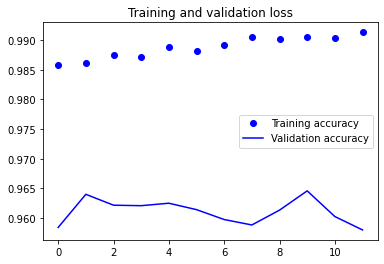

In [39]:
# Que que é 'loss'? É a perda, é o inverso da acurácia
loss = historico.history['accuracy']
val_loss = historico.history['val_accuracy']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Com EarlyStopping foi em torno de 12-13

In [46]:
# Dropout : Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento. Quando tem muitos neurônios por camada
# Enteder cada objeto
rede_simples = Sequential()
rede_simples.add(Flatten())
rede_simples.add(Dense(25, input_dim = 784))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2)) # Sempre depois do Activation()
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
#rede_simples.add(Dropout(0.5))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
#rede_simples.add(Dropout(0.5))
rede_simples.add(Dense(10)) 
rede_simples.add(Activation('softmax'))

In [47]:
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam',
                     metrics = ['accuracy'])

In [48]:
es = EarlyStopping(monitor='val_loss', patience = 10, min_delta = 0.001, verbose = 1, mode = 'auto') 
historico = rede_simples.fit(x_treino,
                 y_treino,
                 epochs = 30, # épocas : número de vezes que o modelo vÊ todo o dataset
                 batch_size = 32, # batches é um hiperparâmetro
                 validation_data = (x_val, y_val),
                 callbacks = [es])  

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5912 - accuracy: 0.8159 - val_loss: 0.2654 - val_accuracy: 0.9179
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3315 - accuracy: 0.8980 - val_loss: 0.2221 - val_accuracy: 0.9327
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2890 - accuracy: 0.9094 - val_loss: 0.2028 - val_accuracy: 0.9363
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9187 - val_loss: 0.1939 - val_accuracy: 0.9409
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.9226 - val_loss: 0.1785 - val_accuracy: 0.9462
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2362 - accuracy: 0.9273 - val_loss: 0.1764 - val_accuracy: 0.9474
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2292 - accuracy: 0.9288 - val_loss: 0.1672 - val_accuracy:

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 0s 1ms/step


0.9378

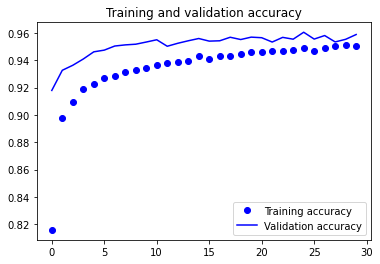

In [51]:
loss = historico.history['accuracy']
val_loss = historico.history['val_accuracy']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Validação dá mais alta que o treino não é overfitting. Problema de particionamento onde o problema ficou muito "fácil".

In [52]:
# Batch normalization : Normalização dos pesos. Fica antes da função de ativação. Usado para redes muito profundas.
# Evita degradação de aprendizado (exploding gradient).
rede_simples = Sequential()
rede_simples.add(Flatten())
rede_simples.add(Dense(25, input_dim = 784))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(BatchNormalization())
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10)) 
rede_simples.add(Activation('softmax'))

In [53]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [54]:
es = EarlyStopping(monitor='val_loss', patience = 5, min_delta = 0.001, verbose = 1, mode = 'auto') 
historico = rede_simples.fit(x_treino,
                 y_treino,
                 epochs = 30, # épocas : número de vezes que o modelo vÊ todo o dataset
                 batch_size = 32, # batches é um hiperparâmetro
                 validation_data = (x_val, y_val),
                 callbacks = [es])  

Epoch 1/30
1500/1500 [==============================] - 5s 2ms/step - loss: 0.4838 - accuracy: 0.8646 - val_loss: 0.2080 - val_accuracy: 0.9392
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2333 - accuracy: 0.9294 - val_loss: 0.1629 - val_accuracy: 0.9505
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1948 - accuracy: 0.9403 - val_loss: 0.1537 - val_accuracy: 0.9535
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1735 - accuracy: 0.9482 - val_loss: 0.1450 - val_accuracy: 0.9576
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1543 - accuracy: 0.9525 - val_loss: 0.1269 - val_accuracy: 0.9622
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1481 - accuracy: 0.9544 - val_loss: 0.1323 - val_accuracy: 0.9613
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1317 - accuracy: 0.9593 - val_loss: 0.1260 - val_accuracy:

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 1s 1ms/step


0.6489

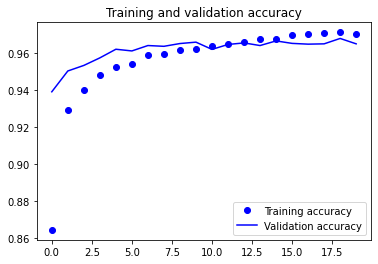

In [56]:
loss = historico.history['accuracy']
val_loss = historico.history['val_accuracy']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### Brincar com CIFAR 10 para a próxima aula